In [1]:
#Shishir Khanal
#July 7, 2025
#Seasonal ARIMA
#pip install pmdarima
import numpy as np
import pandas as pd
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


In [2]:
df = pd.read_csv('co2_mm_mlo.csv')
df.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


In [3]:
#dict(year=df['year'],month=df['month'],day=1)
df['date'] = pd.to_datetime({'year':df['year'],'month':df['month'],'day':1})

In [4]:
df.head()

,year,month,decimal_date,average,interpolated,date
0,1958,3,1958.208,315.71,315.71,1958-03-01
1,1958,4,1958.292,317.45,317.45,1958-04-01
2,1958,5,1958.375,317.50,317.50,1958-05-01
3,1958,6,1958.458,NaN,317.10,1958-06-01
4,1958,7,1958.542,315.86,315.86,1958-07-01


In [11]:
df = df.set_index('date')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 729 entries, 1958-03-01 to 2018-11-01
Data columns (total 5 columns):
year            729 non-null int64
month           729 non-null int64
decimal_date    729 non-null float64
average         722 non-null float64
interpolated    729 non-null float64
dtypes: float64(3), int64(2)
memory usage: 34.2 KB


In [14]:
df.index.freq='MS'
df.head()

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86


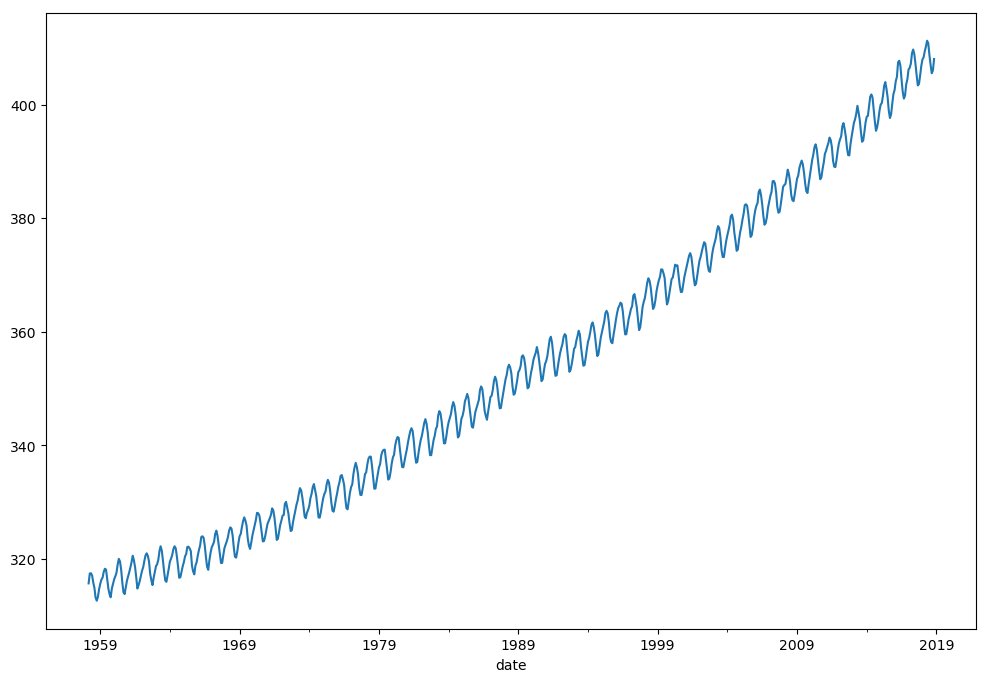

In [15]:
df['interpolated'].plot(figsize=(12,8))

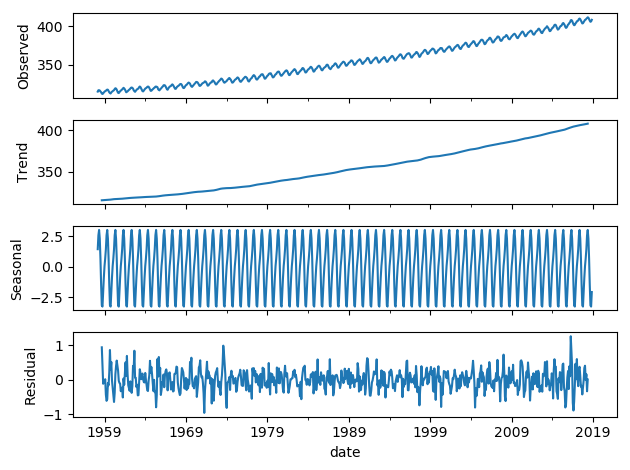

In [16]:
result = seasonal_decompose(df['interpolated'],model='add')
result.plot();

In [17]:
auto_arima(df['interpolated'],seasonal=True,m=12).summary()

/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/stat

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  729
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -206.408
Date:                            Mon, 07 Jul 2025   AIC                            424.816
Time:                                    15:30:43   BIC                            452.358
Sample:                                         0   HQIC                           435.443
                                            - 729                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0009      0.001      1.635      0.102      -0.000       0.002
ar.L1          0.2851      0.079      3.605      0.000       0.130       0.440
ma.L1         -0.6275      0.065     -9.655      0.000      -0.755      -0.500
ar.S.L12       0.9990      0.000   2026.926      0.000       0.998       1.000
ma.S.L12      -0.8572      0.023    -38.013      0.000      -0.901      -0.813
sigma2         0.0968      0.005     20.318      0.000       0.087       0.106
===================================================================================
Ljung-Box (Q):                       53.09   Jarque-Bera (JB):                 4.85
Prob(Q):                              0.08   Prob(JB):                         0.09
Heteroskedasticity (H):               1.08   Skew:                             0.00
Prob(H) (two-sided):                  0.57   Kurtosis:                         3.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
len(df)

729

In [19]:
train = df.iloc[:717]
test = df.iloc[717:]

In [20]:
model = SARIMAX(train['interpolated'],order=(1,1,1), seasonal_order=(1,0,1,12))

In [21]:
results = model.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.91934D-01    |proj g|=  6.99164D-01

At iterate    5    f=  2.92880D-01    |proj g|=  5.09390D-02

At iterate   10    f=  2.92727D-01    |proj g|=  2.42498D-02

At iterate   15    f=  2.92455D-01    |proj g|=  3.81166D-03

At iterate   20    f=  2.92273D-01    |proj g|=  2.69889D-02

At iterate   25    f=  2.85535D-01    |proj g|=  1.73572D-01

At iterate   30    f=  2.83128D-01    |proj g|=  3.53144D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

In [22]:
start = len(train)
end = len(train) + len(test) - 1

In [23]:
predictions = results.predict(start,end,typ='levels').rename('SARIMA predictions')

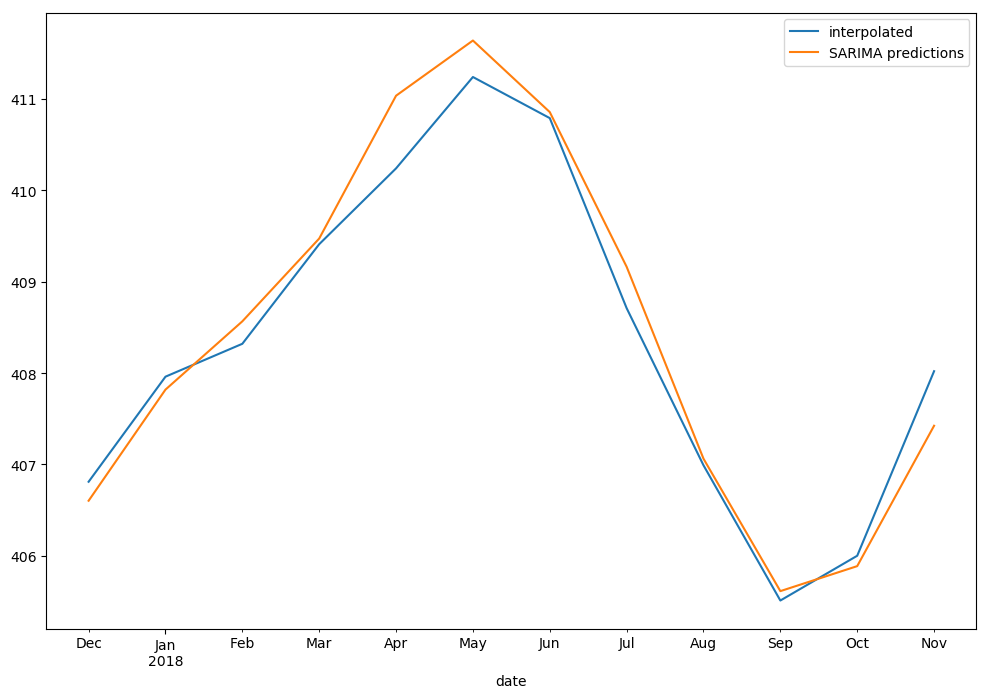

In [25]:
test['interpolated'].plot(legend=True,figsize=(12,8))
predictions.plot(legend=True)

In [26]:
from statsmodels.tools.eval_measures import rmse

In [27]:
error = rmse(test['interpolated'],predictions)
error

0.35520215361019325

In [28]:
test['interpolated'].mean()

408.3333333333333

In [29]:
#Forecast into future
model = SARIMAX(df['interpolated'],order=(1,1,1),seasonal_order=(1,0,1,12))
model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.88259D-01    |proj g|=  6.94024D-01


 This problem is unconstrained.



At iterate    5    f=  3.14929D-01    |proj g|=  1.30102D-01

At iterate   10    f=  3.09611D-01    |proj g|=  7.91088D-03

At iterate   15    f=  3.09429D-01    |proj g|=  6.27244D-02

At iterate   20    f=  3.08442D-01    |proj g|=  1.26450D-02

At iterate   25    f=  3.07021D-01    |proj g|=  1.75047D-01

At iterate   30    f=  2.85982D-01    |proj g|=  5.04929D-02

At iterate   35    f=  2.84614D-01    |proj g|=  4.11620D-03

At iterate   40    f=  2.84522D-01    |proj g|=  9.73886D-03

At iterate   45    f=  2.84519D-01    |proj g|=  7.02772D-04

At iterate   50    f=  2.84519D-01    |proj g|=  5.35367D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [30]:
fcast = results.predict(len(df),len(df)+11,typ='levels').rename('SARIMA FORECAST')

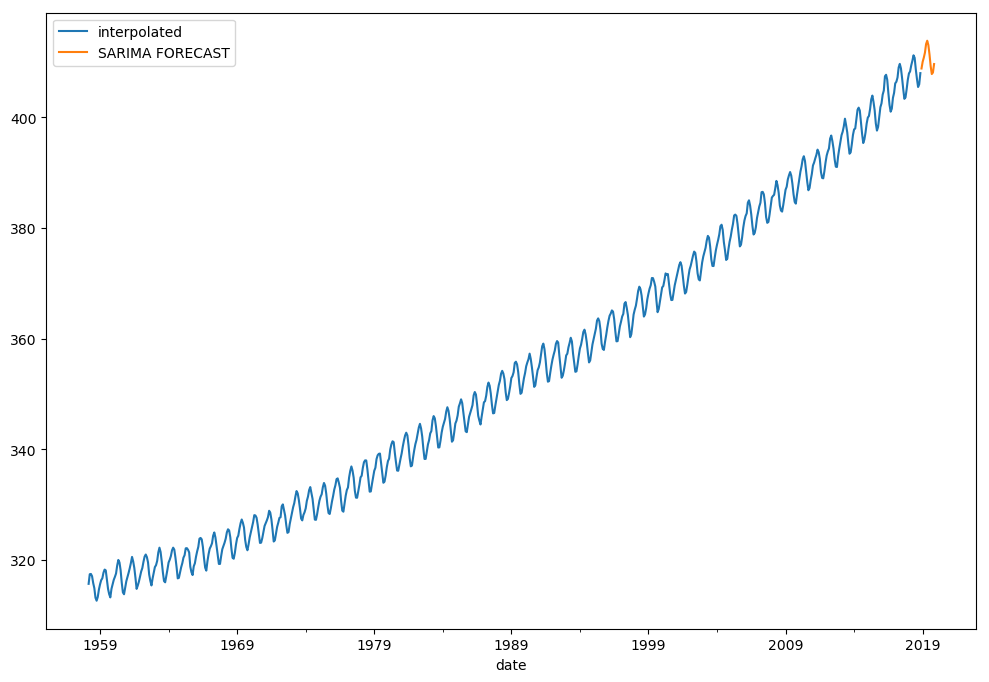

In [31]:
df['interpolated'].plot(legend=True,figsize=(12,8))
fcast.plot(legend=True)

In [32]:
################################################
#Dealing with exogenous regressor variables
################################################
#Lets say we want to forecast future total number of visitors acrossb  restaurants
#SARIMA can predict based on the lagged values
#What if we want to include holiday information?

In [34]:
df = pd.read_csv('RestaurantVisitors.csv',index_col='date',parse_dates=True)
df.index.freq='D'
df.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [35]:
df.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN
2017-05-30,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-31,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN


In [36]:
df1 = df.dropna()

In [37]:
df1.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-18,Tuesday,0,na,30.0,30.0,13.0,18.0,91.0
2017-04-19,Wednesday,0,na,20.0,11.0,30.0,18.0,79.0
2017-04-20,Thursday,0,na,22.0,3.0,19.0,46.0,90.0
2017-04-21,Friday,0,na,38.0,53.0,36.0,38.0,165.0
2017-04-22,Saturday,0,na,97.0,20.0,50.0,59.0,226.0


In [38]:
df1.columns

Index(['weekday', 'holiday', 'holiday_name', 'rest1', 'rest2', 'rest3',
       'rest4', 'total'],
      dtype='object')

In [42]:
cols = ['rest1', 'rest2', 'rest3', 'rest4', 'total']

In [43]:
for column in cols:
    df1[column] = df1[column].astype(int)

In [44]:
df1.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65,25,67,139,296
2016-01-02,Saturday,0,na,24,39,43,85,191
2016-01-03,Sunday,0,na,24,31,66,81,202
2016-01-04,Monday,0,na,23,18,32,32,105
2016-01-05,Tuesday,0,na,2,15,38,43,98


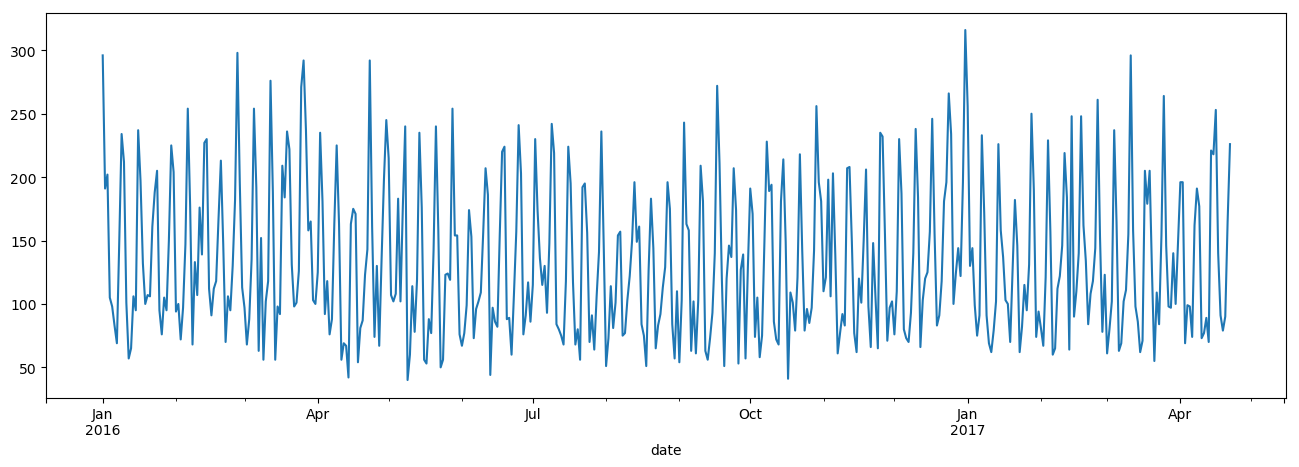

In [45]:
df1['total'].plot(figsize=(16,5))

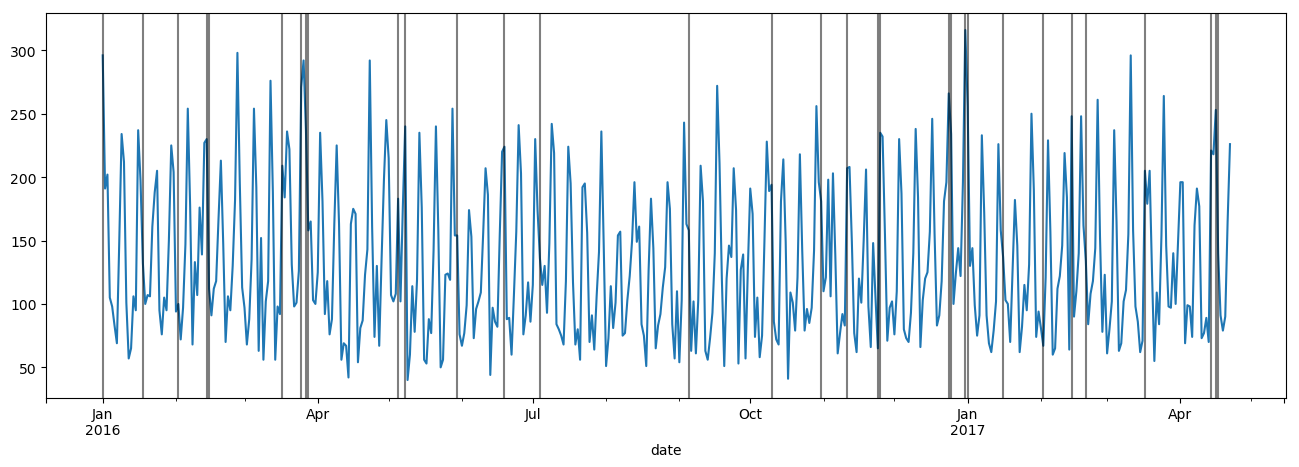

In [47]:
ax = df1['total'].plot(figsize=(16,5))
#df1[df1['holiday']==1].index #also works
for day in df1.query('holiday==1').index: #all the dates where holiday is true
    ax.axvline(x=day,color='black',alpha=0.5);

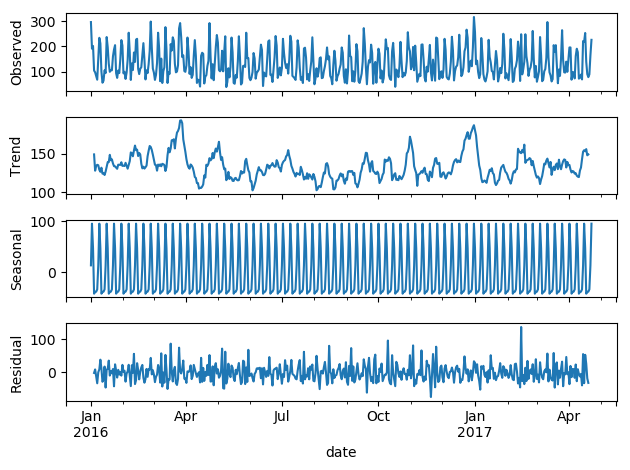

In [49]:
results = seasonal_decompose(df1['total'])
results.plot();

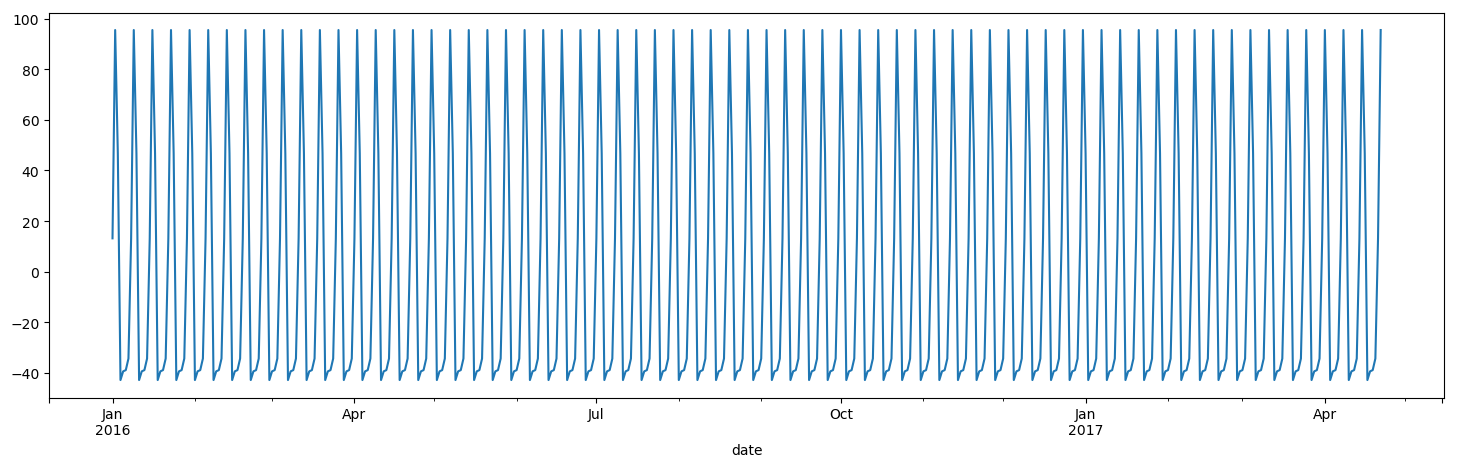

In [51]:
results.seasonal.plot(figsize=(18,5));

In [52]:
len(df1)

478

In [57]:
train = df1.iloc[:436]
test = df1.iloc[436:]
auto_arima(df1['total'],seasonal=True,m=7).summary()

/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/pmdarima/arima/auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(1, 0, 0) seasonal_order=(2, 0, 1, 7); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarnin

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  478
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 7)   Log Likelihood               -2417.721
Date:                           Mon, 07 Jul 2025   AIC                           4845.442
Time:                                   16:26:54   BIC                           4866.290
Sample:                                        0   HQIC                          4853.638
                                           - 478                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     20.5663      4.363      4.714      0.000      12.015      29.118
ar.L1          0.1897      0.045      4.221      0.000       0.102       0.278
ar.S.L7        0.4258      0.037     11.606      0.000       0.354       0.498
ar.S.L14       0.3873      0.036     10.734      0.000       0.317       0.458
sigma2      1427.4030     86.679     16.468      0.000    1257.515    1597.291
===================================================================================
Ljung-Box (Q):                       77.20   Jarque-Bera (JB):                27.47
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                             0.47
Prob(H) (two-sided):                  0.18   Kurtosis:                         3.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [61]:
#ValueError: Non-invertible starting MA params found fix: enforce_invertability=False
model = SARIMAX(train['total'],order=(1,0,0),seasonal_order=(2,0,0,7))

In [62]:
results = model.fit()
results.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.38191D+00    |proj g|=  2.35501D-02

At iterate    5    f=  5.28849D+00    |proj g|=  3.92508D-02

At iterate   10    f=  5.25768D+00    |proj g|=  3.44957D-02

At iterate   15    f=  5.17518D+00    |proj g|=  1.00374D-01

At iterate   20    f=  5.10256D+00    |proj g|=  8.57270D-04

At iterate   25    f=  5.10253D+00    |proj g|=  4.06790D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     35      1     0     0   

 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                             total   No. Observations:                  436
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 7)   Log Likelihood               -2224.701
Date:                           Mon, 07 Jul 2025   AIC                           4457.403
Time:                                   16:28:33   BIC                           4473.713
Sample:                               01-01-2016   HQIC                          4463.840
                                    - 03-11-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2212      0.047      4.711      0.000       0.129       0.313
ar.S.L7        0.5063      0.036     14.187      0.000       0.436       0.576
ar.S.L14       0.4574      0.037     12.379      0.000       0.385       0.530
sigma2      1520.2899     82.277     18.478      0.000    1359.029    1681.550
===================================================================================
Ljung-Box (Q):                       83.96   Jarque-Bera (JB):                29.23
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.34
Prob(H) (two-sided):                  0.37   Kurtosis:                         4.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [63]:
start = len(train)
end = len(train) + len(test) - 1

In [64]:
predictions = results.predict(start,end).rename('SARIMA model')

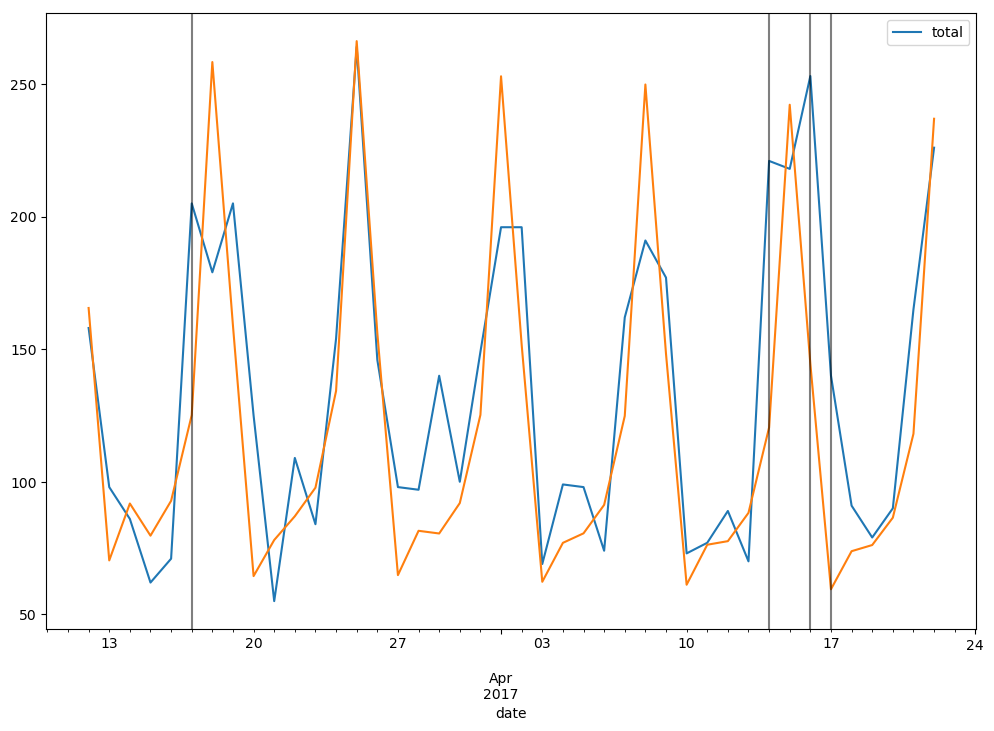

In [68]:
ax = test['total'].plot(legend=True, figsize=(12,8))
predictions.plot()
for day in test.query('holiday==1').index: #all the dates where holiday is true
    ax.axvline(x=day,color='black',alpha=0.5);

In [69]:
rmse(test['total'],predictions)

41.263154924331154

In [71]:
test['total'].mean()

134.26190476190476

In [74]:
##############################################################################
#Does adding the information about the holidays make the model more accurate?
##############################################################################

In [90]:
#auto arima expects the exoegnous variables to have multiple labels, hence double bracket
auto_arima(df1['total'],exogenous=df1[['holiday']],seasonal=True,m=7, trace=True, max_order=10, random=False, stepwise=False, start_p=0, start_q=0, max_p=5, max_q=5).summary()

/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(0, 0, 0) seasonal_order=(1, 0, 1, 7); AIC=4829.778, BIC=4850.626, Fit time=0.582 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(0, 0, 0) seasonal_order=(1, 0, 2, 7); AIC=4874.937, BIC=4899.955, Fit time=1.508 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(0, 0, 0) seasonal_order=(2, 0, 1, 7); AIC=4801.850, BIC=4826.868, Fit time=1.482 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(0, 0, 0) seasonal_order=(2, 0, 2, 7); AIC=4940.422, BIC=4969.610, Fit time=2.033 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(0, 0, 1) seasonal_order=(1, 0, 1, 7); AIC=4799.515, BIC=4824.532, Fit time=0.764 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(0, 0, 1) seasonal_order=(1, 0, 2, 7); AIC=4839.158, BIC=4868.345, Fit time=1.438 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(0, 0, 1) seasonal_order=(2, 0, 1, 7); AIC=4802.646, BIC=4831.833, Fit time=1.879 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(0, 0, 1) seasonal_order=(2, 0, 2, 7); AIC=4783.359, BIC=4816.716, Fit time=1.676 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(0, 0, 2) seasonal_order=(1, 0, 1, 7); AIC=4847.673, BIC=4876.860, Fit time=0.958 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(0, 0, 2) seasonal_order=(1, 0, 2, 7); AIC=5119.856, BIC=5153.213, Fit time=5.012 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(0, 0, 2) seasonal_order=(2, 0, 1, 7); AIC=5089.387, BIC=5122.744, Fit time=1.610 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(0, 0, 2) seasonal_order=(2, 0, 2, 7); AIC=4782.905, BIC=4820.432, Fit time=5.743 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(0, 0, 3) seasonal_order=(1, 0, 1, 7); AIC=5224.797, BIC=5258.154, Fit time=1.602 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(0, 0, 3) seasonal_order=(1, 0, 2, 7); AIC=5122.171, BIC=5159.697, Fit time=5.456 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/pmdarima/arima/auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(0, 0, 3) seasonal_order=(2, 0, 1, 7); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


Fit ARIMA: order=(0, 0, 3) seasonal_order=(2, 0, 1, 7); AIC=nan, BIC=nan, Fit time=nan seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(0, 0, 3) seasonal_order=(2, 0, 2, 7); AIC=5080.708, BIC=5122.404, Fit time=5.955 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(0, 0, 4) seasonal_order=(1, 0, 1, 7); AIC=5155.918, BIC=5193.445, Fit time=1.114 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(0, 0, 4) seasonal_order=(1, 0, 2, 7); AIC=5064.541, BIC=5106.237, Fit time=6.548 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(0, 0, 4) seasonal_order=(2, 0, 1, 7); AIC=5029.726, BIC=5071.422, Fit time=1.933 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(0, 0, 4) seasonal_order=(2, 0, 2, 7); AIC=5006.064, BIC=5051.929, Fit time=6.984 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(0, 0, 5) seasonal_order=(1, 0, 1, 7); AIC=5530.360, BIC=5572.056, Fit time=1.739 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(0, 0, 5) seasonal_order=(1, 0, 2, 7); AIC=5191.992, BIC=5237.857, Fit time=9.160 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(0, 0, 5) seasonal_order=(2, 0, 1, 7); AIC=5409.459, BIC=5455.325, Fit time=2.524 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(0, 0, 5) seasonal_order=(2, 0, 2, 7); AIC=5416.515, BIC=5466.550, Fit time=8.051 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 1, 7); AIC=4724.890, BIC=4749.907, Fit time=0.571 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 2, 7); AIC=4814.835, BIC=4844.022, Fit time=1.595 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(1, 0, 0) seasonal_order=(2, 0, 1, 7); AIC=4784.077, BIC=4813.265, Fit time=1.951 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(1, 0, 0) seasonal_order=(2, 0, 2, 7); AIC=4762.972, BIC=4796.329, Fit time=2.371 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 0, 1, 7); AIC=4796.257, BIC=4825.444, Fit time=0.893 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 0, 2, 7); AIC=4876.902, BIC=4910.259, Fit time=1.790 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(2, 0, 1, 7); AIC=4798.590, BIC=4831.947, Fit time=2.393 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/pmdarima/arima/auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(1, 0, 2) seasonal_order=(1, 0, 1, 7); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/pmdarima/arima/auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(1, 0, 2) seasonal_order=(1, 0, 2, 7); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/pmdarima/arima/auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(1, 0, 2) s

Fit ARIMA: order=(1, 0, 1) seasonal_order=(2, 0, 2, 7); AIC=4752.099, BIC=4789.626, Fit time=1.797 seconds
Fit ARIMA: order=(1, 0, 2) seasonal_order=(1, 0, 1, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 0, 2) seasonal_order=(1, 0, 2, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 0, 2) seasonal_order=(2, 0, 1, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 0, 2) seasonal_order=(2, 0, 2, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 0, 3) seasonal_order=(1, 0, 1, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 0, 3) seasonal_order=(1, 0, 2, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 0, 3) seasonal_order=(2, 0, 1, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 0, 3) seasonal_order=(2, 0, 2, 7); AIC=nan, BIC=nan, Fit time=nan seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(1, 0, 4) seasonal_order=(1, 0, 1, 7); AIC=4728.458, BIC=4770.154, Fit time=1.240 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(1, 0, 4) seasonal_order=(1, 0, 2, 7); AIC=4765.339, BIC=4811.204, Fit time=7.207 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(1, 0, 4) seasonal_order=(2, 0, 1, 7); AIC=5037.133, BIC=5082.999, Fit time=2.752 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/pmdarima/arima/auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(1, 0, 4) seasonal_order=(2, 0, 2, 7); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


Fit ARIMA: order=(1, 0, 4) seasonal_order=(2, 0, 2, 7); AIC=nan, BIC=nan, Fit time=nan seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(1, 0, 5) seasonal_order=(1, 0, 1, 7); AIC=5066.289, BIC=5112.155, Fit time=1.853 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(1, 0, 5) seasonal_order=(1, 0, 2, 7); AIC=5069.504, BIC=5119.539, Fit time=6.993 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(1, 0, 5) seasonal_order=(2, 0, 1, 7); AIC=5382.532, BIC=5432.568, Fit time=2.704 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(1, 0, 5) seasonal_order=(2, 0, 2, 7); AIC=5336.717, BIC=5390.922, Fit time=8.390 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 0, 0) seasonal_order=(1, 0, 1, 7); AIC=5162.815, BIC=5192.003, Fit time=0.982 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 0, 0) seasonal_order=(1, 0, 2, 7); AIC=4860.452, BIC=4893.809, Fit time=1.810 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 0, 0) seasonal_order=(2, 0, 1, 7); AIC=5086.813, BIC=5120.170, Fit time=1.975 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/pmdarima/arima/auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(2, 0, 1) seasonal_order=(1, 0, 1, 7); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/pmdarima/arima/auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(2, 0, 1) seasonal_order=(1, 0, 2, 7); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/pmdarima/arima/auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(2, 0, 1) s

Fit ARIMA: order=(2, 0, 0) seasonal_order=(2, 0, 2, 7); AIC=5078.284, BIC=5115.810, Fit time=1.882 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(1, 0, 1, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(1, 0, 2, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(2, 0, 1, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(2, 0, 2, 7); AIC=nan, BIC=nan, Fit time=nan seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 0, 1, 7); AIC=4843.780, BIC=4881.306, Fit time=1.649 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 0, 2, 7); AIC=4819.600, BIC=4861.296, Fit time=5.392 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 0, 2) seasonal_order=(2, 0, 1, 7); AIC=5043.790, BIC=5085.486, Fit time=2.512 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/pmdarima/arima/auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(2, 0, 2) seasonal_order=(2, 0, 2, 7); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


Fit ARIMA: order=(2, 0, 2) seasonal_order=(2, 0, 2, 7); AIC=nan, BIC=nan, Fit time=nan seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 0, 3) seasonal_order=(1, 0, 1, 7); AIC=5094.567, BIC=5136.263, Fit time=1.950 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 0, 3) seasonal_order=(1, 0, 2, 7); AIC=5095.954, BIC=5141.820, Fit time=7.945 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 0, 3) seasonal_order=(2, 0, 1, 7); AIC=5018.376, BIC=5064.241, Fit time=2.391 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 0, 3) seasonal_order=(2, 0, 2, 7); AIC=4988.581, BIC=5038.617, Fit time=8.319 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 0, 4) seasonal_order=(1, 0, 1, 7); AIC=5143.847, BIC=5189.712, Fit time=1.794 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 0, 4) seasonal_order=(1, 0, 2, 7); AIC=5157.214, BIC=5207.249, Fit time=8.431 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 0, 4) seasonal_order=(2, 0, 1, 7); AIC=5075.150, BIC=5125.185, Fit time=2.478 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 0, 4) seasonal_order=(2, 0, 2, 7); AIC=5073.052, BIC=5127.257, Fit time=8.465 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 0, 5) seasonal_order=(1, 0, 1, 7); AIC=5363.228, BIC=5413.264, Fit time=2.106 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 0, 5) seasonal_order=(1, 0, 2, 7); AIC=5098.231, BIC=5152.436, Fit time=8.528 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 0, 5) seasonal_order=(2, 0, 1, 7); AIC=5305.561, BIC=5359.766, Fit time=2.825 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(3, 0, 0) seasonal_order=(1, 0, 1, 7); AIC=5194.086, BIC=5227.443, Fit time=1.201 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(3, 0, 0) seasonal_order=(1, 0, 2, 7); AIC=4956.177, BIC=4993.704, Fit time=1.994 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(3, 0, 0) seasonal_order=(2, 0, 1, 7); AIC=5104.498, BIC=5142.025, Fit time=5.891 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(3, 0, 0) seasonal_order=(2, 0, 2, 7); AIC=5089.427, BIC=5131.123, Fit time=6.104 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(3, 0, 1) seasonal_order=(1, 0, 1, 7); AIC=4828.984, BIC=4866.510, Fit time=1.057 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(3, 0, 1) seasonal_order=(1, 0, 2, 7); AIC=5053.158, BIC=5094.854, Fit time=1.922 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/pmdarima/arima/auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(3, 0, 1) seasonal_order=(2, 0, 1, 7); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


Fit ARIMA: order=(3, 0, 1) seasonal_order=(2, 0, 1, 7); AIC=nan, BIC=nan, Fit time=nan seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/pmdarima/arima/auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(3, 0, 2) seasonal_order=(1, 0, 1, 7); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/pmdarima/arima/auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(3, 0, 2) seasonal_order=(1, 0, 2, 7); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/pmdarima/arima/auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(3, 0, 2) s

Fit ARIMA: order=(3, 0, 1) seasonal_order=(2, 0, 2, 7); AIC=4945.186, BIC=4991.052, Fit time=7.339 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(1, 0, 1, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(1, 0, 2, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(2, 0, 1, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(2, 0, 2, 7); AIC=nan, BIC=nan, Fit time=nan seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(3, 0, 3) seasonal_order=(1, 0, 1, 7); AIC=5010.449, BIC=5056.315, Fit time=1.548 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/pmdarima/arima/auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(3, 0, 3) seasonal_order=(1, 0, 2, 7); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


Fit ARIMA: order=(3, 0, 3) seasonal_order=(1, 0, 2, 7); AIC=nan, BIC=nan, Fit time=nan seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(3, 0, 3) seasonal_order=(2, 0, 1, 7); AIC=4993.325, BIC=5043.360, Fit time=8.624 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/pmdarima/arima/auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(3, 0, 3) seasonal_order=(2, 0, 2, 7); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


Fit ARIMA: order=(3, 0, 3) seasonal_order=(2, 0, 2, 7); AIC=nan, BIC=nan, Fit time=nan seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(3, 0, 4) seasonal_order=(1, 0, 1, 7); AIC=5084.476, BIC=5134.512, Fit time=1.639 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(3, 0, 4) seasonal_order=(1, 0, 2, 7); AIC=5083.856, BIC=5138.061, Fit time=8.594 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(3, 0, 4) seasonal_order=(2, 0, 1, 7); AIC=5060.896, BIC=5115.101, Fit time=9.266 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(3, 0, 5) seasonal_order=(1, 0, 1, 7); AIC=5092.587, BIC=5146.792, Fit time=2.275 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(4, 0, 0) seasonal_order=(1, 0, 1, 7); AIC=5164.085, BIC=5201.612, Fit time=1.423 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(4, 0, 0) seasonal_order=(1, 0, 2, 7); AIC=5079.405, BIC=5121.101, Fit time=2.062 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(4, 0, 0) seasonal_order=(2, 0, 1, 7); AIC=5160.528, BIC=5202.224, Fit time=6.865 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(4, 0, 0) seasonal_order=(2, 0, 2, 7); AIC=5113.234, BIC=5159.100, Fit time=7.433 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(4, 0, 1) seasonal_order=(1, 0, 1, 7); AIC=5104.931, BIC=5146.627, Fit time=1.389 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(4, 0, 1) seasonal_order=(1, 0, 2, 7); AIC=5073.303, BIC=5119.169, Fit time=2.152 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(4, 0, 1) seasonal_order=(2, 0, 1, 7); AIC=5083.707, BIC=5129.573, Fit time=6.840 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/pmdarima/arima/auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(4, 0, 2) seasonal_order=(1, 0, 1, 7); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/pmdarima/arima/auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(4, 0, 2) seasonal_order=(1, 0, 2, 7); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/pmdarima/arima/auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(4, 0, 2) s

Fit ARIMA: order=(4, 0, 1) seasonal_order=(2, 0, 2, 7); AIC=5082.023, BIC=5132.058, Fit time=8.752 seconds
Fit ARIMA: order=(4, 0, 2) seasonal_order=(1, 0, 1, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(4, 0, 2) seasonal_order=(1, 0, 2, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(4, 0, 2) seasonal_order=(2, 0, 1, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(4, 0, 2) seasonal_order=(2, 0, 2, 7); AIC=nan, BIC=nan, Fit time=nan seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(4, 0, 3) seasonal_order=(1, 0, 1, 7); AIC=5093.123, BIC=5143.158, Fit time=2.059 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(4, 0, 3) seasonal_order=(1, 0, 2, 7); AIC=5068.919, BIC=5123.124, Fit time=8.630 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(4, 0, 3) seasonal_order=(2, 0, 1, 7); AIC=5066.242, BIC=5120.447, Fit time=7.713 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(4, 0, 4) seasonal_order=(1, 0, 1, 7); AIC=5068.447, BIC=5122.652, Fit time=1.807 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(5, 0, 0) seasonal_order=(1, 0, 1, 7); AIC=5146.666, BIC=5188.362, Fit time=1.176 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(5, 0, 0) seasonal_order=(1, 0, 2, 7); AIC=5103.982, BIC=5149.848, Fit time=2.510 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(5, 0, 0) seasonal_order=(2, 0, 1, 7); AIC=5315.685, BIC=5361.551, Fit time=8.096 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(5, 0, 0) seasonal_order=(2, 0, 2, 7); AIC=5122.595, BIC=5172.630, Fit time=7.257 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(5, 0, 1) seasonal_order=(1, 0, 1, 7); AIC=4887.681, BIC=4933.546, Fit time=1.205 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(5, 0, 1) seasonal_order=(1, 0, 2, 7); AIC=5024.513, BIC=5074.548, Fit time=2.114 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(5, 0, 1) seasonal_order=(2, 0, 1, 7); AIC=5117.635, BIC=5167.670, Fit time=8.367 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/pmdarima/arima/auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(5, 0, 2) seasonal_order=(1, 0, 1, 7); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/pmdarima/arima/auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(5, 0, 2) seasonal_order=(1, 0, 2, 7); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


Fit ARIMA: order=(5, 0, 1) seasonal_order=(2, 0, 2, 7); AIC=5069.218, BIC=5123.423, Fit time=8.096 seconds
Fit ARIMA: order=(5, 0, 2) seasonal_order=(1, 0, 1, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(5, 0, 2) seasonal_order=(1, 0, 2, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(5, 0, 2) seasonal_order=(2, 0, 1, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(5, 0, 3) seasonal_order=(1, 0, 1, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 366.777 seconds


/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/pmdarima/arima/auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(5, 0, 2) seasonal_order=(2, 0, 1, 7); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/pmdarima/arima/auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(5, 0, 3) seasonal_order=(1, 0, 1, 7); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  478
Model:             SARIMAX(1, 0, 0)x(1, 0, 1, 7)   Log Likelihood               -2356.445
Date:                           Mon, 07 Jul 2025   AIC                           4724.890
Time:                                   17:00:14   BIC                           4749.907
Sample:                                        0   HQIC                          4734.725
                                           - 478                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     21.4270      3.453      6.206      0.000      14.660      28.194
x1            56.9734      4.501     12.658      0.000      48.152      65.795
ar.L1          0.1338      0.048      2.793      0.005       0.040       0.228
ar.S.L7        0.8290      0.027     30.957      0.000       0.777       0.881
ma.S.L7       -0.3501      0.062     -5.623      0.000      -0.472      -0.228
sigma2      1085.5328     76.176     14.250      0.000     936.230    1234.835
===================================================================================
Ljung-Box (Q):                      112.12   Jarque-Bera (JB):                 5.76
Prob(Q):                              0.00   Prob(JB):                         0.06
Heteroskedasticity (H):               0.91   Skew:                             0.26
Prob(H) (two-sided):                  0.56   Kurtosis:                         3.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [91]:
#Train SARIMAX
model = SARIMAX(train['total'],exog=train[['holiday']],order=(1,0,0),seasonal_order=(1,0,1,7),enforce_stationarity=False)

In [92]:
result = model.fit();
result.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.41346D+00    |proj g|=  2.29138D-01

At iterate    5    f=  5.33127D+00    |proj g|=  3.80259D-02

At iterate   10    f=  5.31905D+00    |proj g|=  2.10158D-01


 This problem is unconstrained.



At iterate   15    f=  5.03398D+00    |proj g|=  1.19128D+00

At iterate   20    f=  5.02869D+00    |proj g|=  4.34715D-03

At iterate   25    f=  5.02858D+00    |proj g|=  5.78546D-02

At iterate   30    f=  5.01906D+00    |proj g|=  1.22453D+00

At iterate   35    f=  4.82002D+00    |proj g|=  9.60956D+00

At iterate   40    f=  4.67297D+00    |proj g|=  1.13327D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     44     77      1     0     0   1.254D-03   4.673D+00
  F =   4.6728606837250295     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 Cauchy                time 0.000E+00 seconds.
 Su


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                             total   No. Observations:                  436
Model:             SARIMAX(1, 0, 0)x(1, 0, 1, 7)   Log Likelihood               -2037.367
Date:                           Mon, 07 Jul 2025   AIC                           4084.735
Time:                                   17:05:51   BIC                           4105.030
Sample:                               01-01-2016   HQIC                          4092.750
                                    - 03-11-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       66.3653      3.852     17.229      0.000      58.816      73.915
ar.L1          0.1857      0.045      4.155      0.000       0.098       0.273
ar.S.L7        0.9991      0.001   1513.805      0.000       0.998       1.000
ma.S.L7       -1.0000     24.460     -0.041      0.967     -48.941      46.941
sigma2       746.2033   1.82e+04      0.041      0.967    -3.5e+04    3.65e+04
===================================================================================
Ljung-Box (Q):                       33.07   Jarque-Bera (JB):                21.75
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               1.05   Skew:                             0.28
Prob(H) (two-sided):                  0.76   Kurtosis:                         3.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [93]:
start = len(train)
end = len(train) + len(test) - 1

In [94]:
predictions = result.predict(start,end,exog=test[['holiday']]).rename('SARIMAX with Exog')

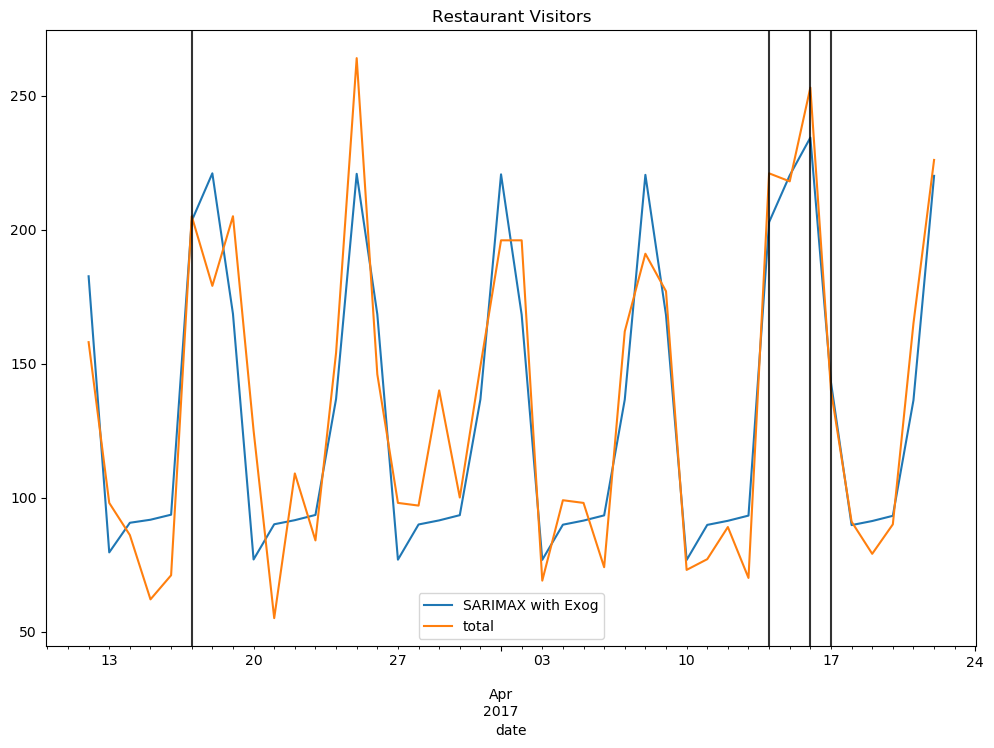

In [95]:
predictions.plot(figsize=(12,8),legend=True)
ax = test['total'].plot(legend=True,title='Restaurant Visitors')

for day in test.query('holiday==1').index: #all the dates where holiday is true
    ax.axvline(x=day,color='k',alpha=0.8);

In [96]:
rmse(test['total'],predictions)

22.40027369388081

In [98]:
model = SARIMAX(df1['total'],exog=df1[['holiday']],order=(1,0,0),seasonal_order=(1,0,1,7),enforce_stationarity=False)
results = model.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.42257D+00    |proj g|=  2.30082D-01

At iterate    5    f=  5.33996D+00    |proj g|=  3.62262D-02

At iterate   10    f=  5.32675D+00    |proj g|=  3.66068D-01

At iterate   15    f=  5.08879D+00    |proj g|=  4.49509D+00

At iterate   20    f=  5.04056D+00    |proj g|=  4.49534D-03

At iterate   25    f=  5.02941D+00    |proj g|=  1.86802D+00

At iterate   30    f=  4.78202D+00    |proj g|=  7.99440D+00

At iterate   35    f=  4.66631D+00    |proj g|=  4.26814D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

In [103]:
exog_forecast = df[478:][['holiday']]
#exog_forecast

In [104]:
fcast = results.predict(len(df1),len(df1)+38,exog=exog_forecast).rename('Final SARIMAX Forecast')

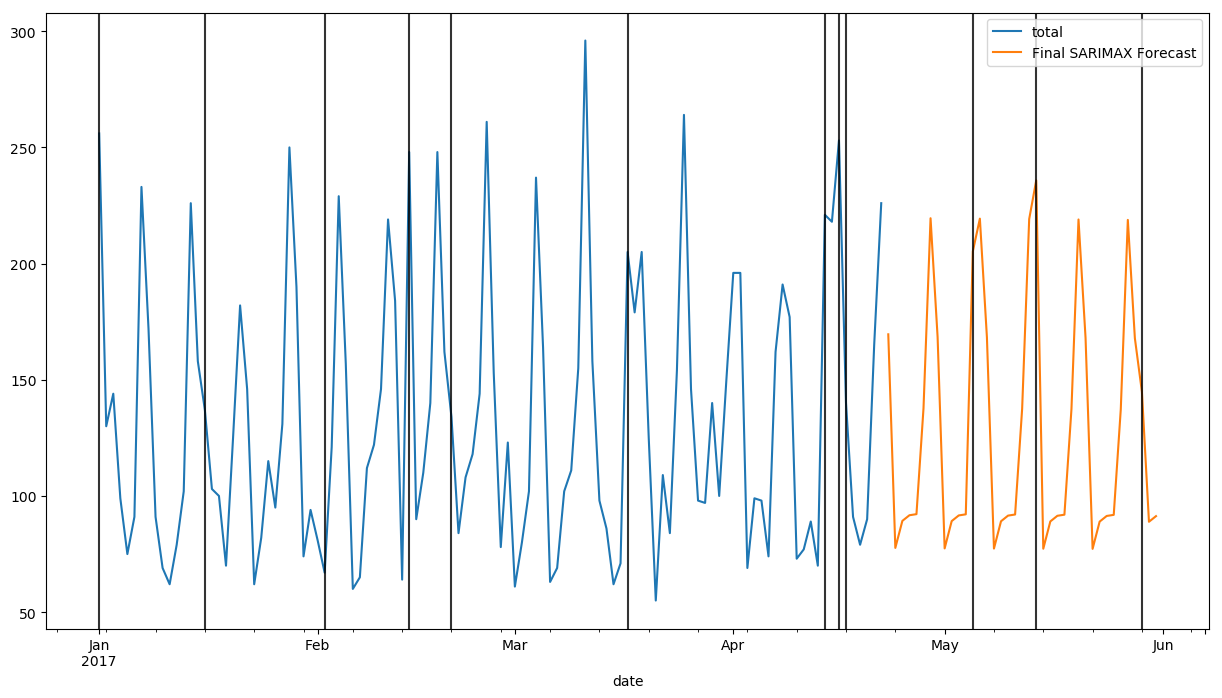

In [111]:
ax = df1['total'].loc['2017-01-01':].plot(figsize=(15,8),legend=True)
fcast.plot(legend=True)

for day in df.query('holiday==1').loc['2017-01-01':].index: #all the dates where holiday is true
    ax.axvline(x=day,color='k',alpha=0.8);